In [4]:
!pip install xlrd

In [7]:
!pip install openpyxl

  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8913 sha256=35ab1bb455b2f08ec7242357958b0a551972f8a5731da5b8fba24a97d608780d
  Stored in directory: c:\users\c n manjunath\appdata\local\pip\cache\wheels\6e\df\38\abda47b884e3e25f9f9b6430e5ce44c47670758a50c0c51759
Successfully built et-xmlfile


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sn
air = pd.read_excel('D:\\EXCEL R\\ASSIGNMENTS\\CLUSTERING\\EastWestairlines.xlsx',sheet_name=1)
air.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [10]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
# Normalized data frame (considering the numerical part of data)
air_norm = norm_func(air.iloc[:,1:])
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
airway1 = pd.DataFrame(trans.fit_transform(air.iloc[:,1:]))
airway1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


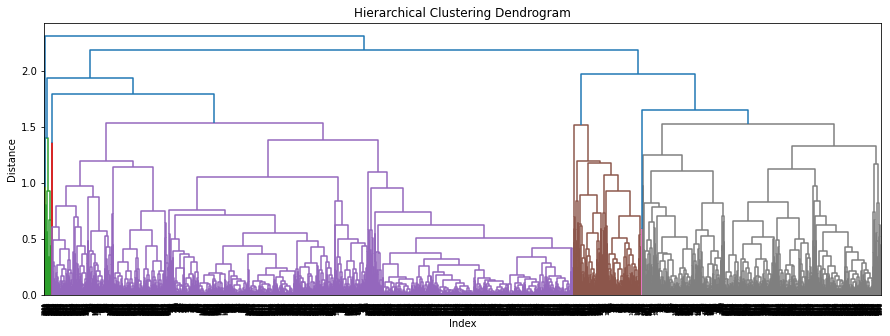

In [14]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

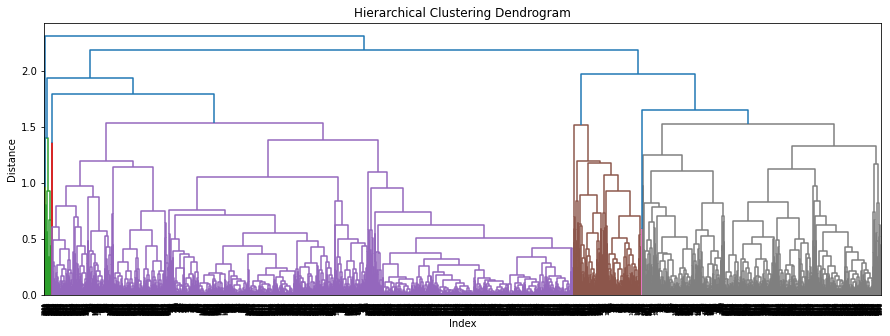

In [15]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(air_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
air['clust']=cluster_labels # creating a  new column and assigning it to new column 
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [17]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=7, linkage='complete',affinity = "euclidean").fit(air_norm) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
air['clust']=cluster_labels # creating a  new column and assigning it to new column 
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [18]:
air.iloc[:,1:].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,59961.123244,88.551987,1.712967,1.000401,1.006022,10170.362505,9.095143,227.239663,0.653553,3824.722601,0.000000,0
1,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000,1
2,79918.920175,218.528947,2.098246,1.009649,1.000877,16823.058772,13.392982,740.800877,2.239474,4298.630702,1.000000,2
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4
5,64521.000000,295.500000,1.250000,1.000000,4.250000,73273.750000,15.750000,575.000000,2.250000,4242.750000,0.500000,5
6,152861.250000,8804.750000,4.000000,1.000000,1.000000,33927.500000,19.000000,500.000000,1.500000,5944.000000,1.000000,6


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
air_subset = pd.DataFrame(scaler.fit_transform(air.iloc[:,1:]))
air_subset

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,-0.721926
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-0.721926
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-0.721926
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-0.721926
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0.314692
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1.351311
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1.351311
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,1.351311
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,-0.721926


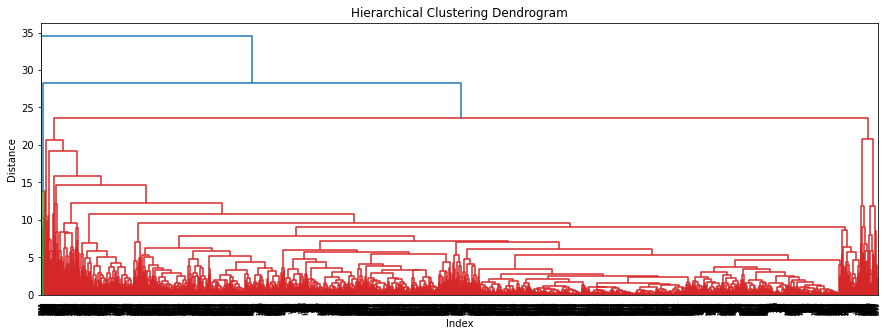

In [20]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air_subset, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=0.,  # rotates the x axis labels
    #leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

# K MEANS CLUSTERING

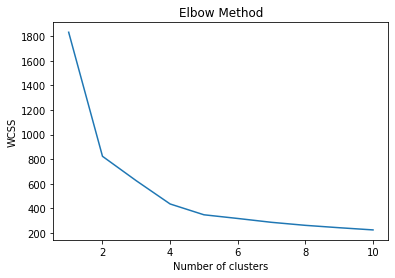

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airway1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(air_subset)
    sil_score1= silhouette_score(air_subset, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 2 The average silhouette_score is : 0.3263284343461537


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 3 The average silhouette_score is : 0.33793655875066847


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 4 The average silhouette_score is : 0.34226082441921557


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 5 The average silhouette_score is : 0.3451288112545826


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 6 The average silhouette_score is : 0.3514436502435609


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 7 The average silhouette_score is : 0.3605484162666231


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 8 The average silhouette_score is : 0.3246653929993341


D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


For n_clusters = 9 The average silhouette_score is : 0.2793522983787361


In [23]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(air_subset)
y_predict1.shape

D:\anaconda\envs\xyz\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


(3999,)

In [24]:
y_predict1

array([1, 1, 1, ..., 3, 1, 1])

In [25]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [26]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 1.25105563e+00,  9.86785457e-01,  1.93507607e-01,
        -9.82418871e-02, -6.27665798e-02,  7.52327634e-01,
         1.77632536e+00,  3.85876039e+00,  4.12208236e+00,
         2.83491044e-01,  9.66448351e-01,  7.67733305e-01],
       [-2.90033376e-01, -7.33264629e-02, -5.27347442e-01,
        -9.82418871e-02, -6.03468720e-02, -5.02970850e-01,
        -4.46817182e-01, -2.12563841e-01, -2.33760624e-01,
        -2.24488719e-01, -7.66919299e-01, -7.21926337e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01,  1.07487962e+00],
       [-1.11583814e-01,  6.39746235e-02,  1.18088519e-02,
        -9.82418871e-02, -6.27665798e-02, -8.39987132e-02,
         3.99000283e-02, -3.96258199e-02, -3.54131124e-02,
         6.90454048e-02,  1.30391816e+00,  1.36681408e+00],
       [ 8.00943409e-01, -4.98044278e-02,  1.5915878

In [27]:
# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

22296.117269781636

In [28]:
model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [29]:
air['air_id']= model1.labels_

In [30]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,air_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,4


In [31]:
air.groupby("air_id").agg(['mean']).reset_index()

,air_id,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1719.044444,199661.525926,907.459259,2.325926,1.000000,1.000000,35312.014815,28.659259,5862.451852,17.007407,4703.933333,0.837037,1.437037
1,1,2258.294479,44424.808400,87.309108,1.335064,1.000000,1.000472,5011.691836,7.322322,162.541765,0.487022,3657.210005,0.000000,0.000000
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.733333
3,3,1946.854437,62357.800598,193.603190,2.075773,1.000000,1.000000,15116.449651,11.985045,404.578265,1.239282,4261.129611,1.000000,2.014955
4,4,1410.255848,154479.160819,105.896199,4.254386,1.000000,1.002924,52592.051170,20.197368,388.100877,1.173977,5221.747076,0.497076,0.581871
5,5,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,3.395349


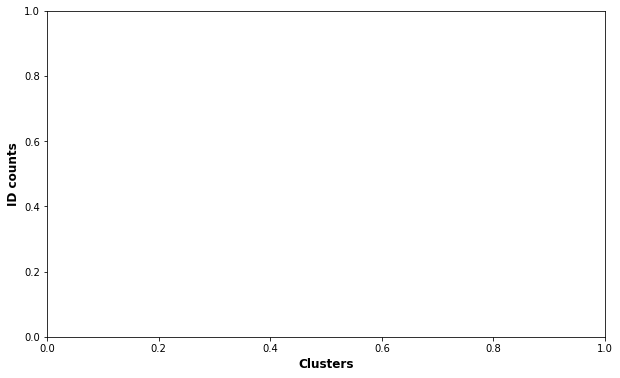

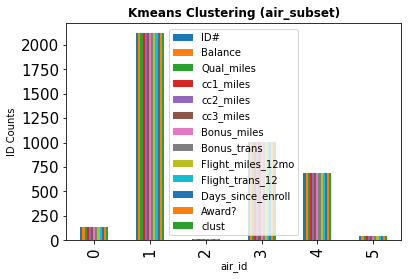

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['air_id']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Kmeans Clustering (air_subset)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [33]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1000, min_samples=5)
dbscan.fit(air)                

DBSCAN(eps=1000)

In [34]:
#Noisy samples are given the label -1.
dbscan.labels_   

array([-1,  0, -1, ..., -1, -1,  0], dtype=int64)

In [35]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 
cl


,cluster
0,-1
1,0
2,-1
3,0
4,-1
...,...
3994,-1
3995,-1
3996,-1
3997,-1


In [36]:
cl
pd.set_option("display.max_rows", None) 

In [37]:
cl

,cluster
0,-1
1,0
2,-1
3,0
4,-1
5,0
6,-1
7,-1
8,-1
9,-1
